# **RAINTECH TEMPERATURA**

Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

Configurar tamanho da figura

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 6

Importando dados do INMET

In [10]:
import requests

url = "https://apitempo.inmet.gov.br/estacao/2022-03-04/2022-06-06/A201"
resultado = requests.get(url)
dados = resultado.json()

Covertendo em DataFrame e filtrando

In [11]:
import pandas as pd
import json

dados_str = json.dumps(dados)
dados_tabela = pd.read_json(dados_str)

dados_filtrados = dados_tabela[["DT_MEDICAO","HR_MEDICAO","RAD_GLO","TEM_INS","UMD_INS"]]

print(dados_filtrados)

      DT_MEDICAO  HR_MEDICAO  RAD_GLO  TEM_INS  UMD_INS
0     2022-03-04           0     -0.5     24.6     96.0
1     2022-03-04         100      NaN      NaN      NaN
2     2022-03-04         200     -0.7     24.4     90.0
3     2022-03-04         300     -1.5     24.3     97.0
4     2022-03-04         400     -1.8     24.0     97.0
...          ...         ...      ...      ...      ...
2275  2022-06-06        1900   2150.4     32.0     59.0
2276  2022-06-06        2000    935.0     31.2     64.0
2277  2022-06-06        2100    326.4     30.1     65.0
2278  2022-06-06        2200     18.5     23.5     98.0
2279  2022-06-06        2300      1.8     23.9     97.0

[2280 rows x 5 columns]


Separando Temperatura

In [12]:
temperatura = dados_filtrados.TEM_INS
temperatura

0       24.6
1        NaN
2       24.4
3       24.3
4       24.0
        ... 
2275    32.0
2276    31.2
2277    30.1
2278    23.5
2279    23.9
Name: TEM_INS, Length: 2280, dtype: float64

Lidando com NAs

Numero de NAs na temperatura 4
Numero de NAs na temperatura 0


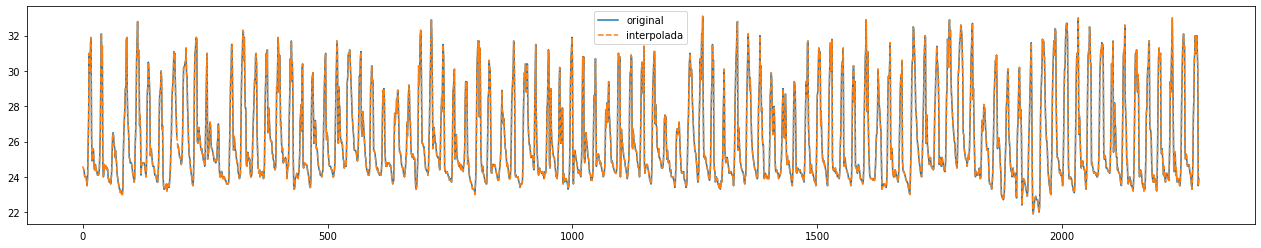

In [13]:
print("Numero de NAs na temperatura",temperatura.isna().sum())
temperatura1 = temperatura.interpolate(method="linear")
print("Numero de NAs na temperatura",temperatura1.isna().sum())

temperatura.plot(figsize=(22,4), label="original")
temperatura1.plot(figsize=(22,4),style=["--"],label="interpolada")
plt.legend()

## **Criação da Série**

In [14]:
temperatura2 = temperatura1.values
temperatura2

array([24.6, 24.5, 24.4, ..., 30.1, 23.5, 23.9])

In [15]:
temperatura3 = list(temperatura2.flatten()) 
print(temperatura3)

[24.6, 24.5, 24.4, 24.3, 24.0, 24.0, 24.0, 24.0, 23.7, 23.5, 24.1, 25.7, 27.3, 31.0, 30.1, 29.9, 31.6, 31.9, 26.4, 24.9, 25.6, 25.6, 25.5, 24.6, 24.4, 24.6, 24.7, 24.5, 24.3, 24.3, 24.1, 24.1, 24.1, 24.2, 24.5, 25.5, 26.8, 30.1, 32.1, 30.6, 31.4, 24.7, 24.0, 24.1, 24.7, 24.5, 24.6, 24.5, 24.6, 24.4, 24.5, 24.4, 23.9, 23.9, 23.7, 23.7, 23.8, 23.6, 23.8, 24.3, 25.4, 26.3, 26.5, 26.3, 25.8, 25.7, 25.1, 25.5, 25.1, 24.8, 24.2, 24.0, 23.8, 23.6, 23.5, 23.3, 23.3, 23.1, 23.2, 23.2, 23.0, 23.0, 23.4, 25.4, 26.6, 27.2, 27.9, 29.0, 29.0, 31.8, 31.9, 28.6, 27.2, 26.9, 26.2, 25.1, 25.0, 24.8, 24.8, 24.8, 24.7, 24.5, 24.2, 24.1, 23.9, 23.7, 23.9, 25.6, 26.5, 27.9, 30.7, 31.8, 32.8, 30.7, 31.2, 30.5, 26.9, 27.5, 26.5, 24.1, 24.6, 24.7, 24.8, 24.8, 24.8, 24.8, 24.7, 24.5, 24.3, 24.0, 24.4, 26.9, 28.8, 29.2, 30.5, 30.1, 29.4, 28.5, 25.2, 25.4, 25.6, 25.2, 24.9, 24.6, 24.6, 24.6, 24.5, 24.1, 24.1, 24.1, 24.0, 23.8, 23.7, 23.7, 24.1, 24.9, 27.0, 28.6, 28.8, 29.1, 30.0, 29.6, 26.7, 26.9, 24.1, 23.5, 23.

In [16]:
indicetemp = pd.date_range('2022-03-04', periods = len(temperatura3), freq = '1H')
indicetemp

DatetimeIndex(['2022-03-04 00:00:00', '2022-03-04 01:00:00',
               '2022-03-04 02:00:00', '2022-03-04 03:00:00',
               '2022-03-04 04:00:00', '2022-03-04 05:00:00',
               '2022-03-04 06:00:00', '2022-03-04 07:00:00',
               '2022-03-04 08:00:00', '2022-03-04 09:00:00',
               ...
               '2022-06-06 14:00:00', '2022-06-06 15:00:00',
               '2022-06-06 16:00:00', '2022-06-06 17:00:00',
               '2022-06-06 18:00:00', '2022-06-06 19:00:00',
               '2022-06-06 20:00:00', '2022-06-06 21:00:00',
               '2022-06-06 22:00:00', '2022-06-06 23:00:00'],
              dtype='datetime64[ns]', length=2280, freq='H')

In [18]:
serie_temp = pd.Series(temperatura3, index = indicetemp)
serie_temp

2022-03-04 00:00:00    24.6
2022-03-04 01:00:00    24.5
2022-03-04 02:00:00    24.4
2022-03-04 03:00:00    24.3
2022-03-04 04:00:00    24.0
                       ... 
2022-06-06 19:00:00    32.0
2022-06-06 20:00:00    31.2
2022-06-06 21:00:00    30.1
2022-06-06 22:00:00    23.5
2022-06-06 23:00:00    23.9
Freq: H, Length: 2280, dtype: float64

Gráfico da série

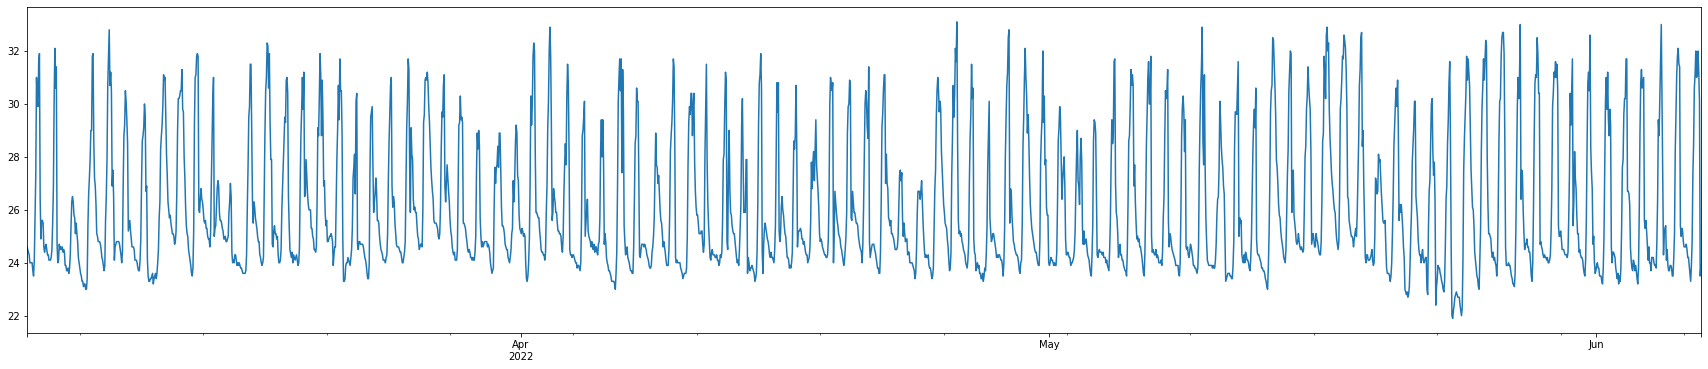

In [19]:
serie_temp.plot()
plt.show()

## **Análise e Preparação da Série**

### **Média Móvel**

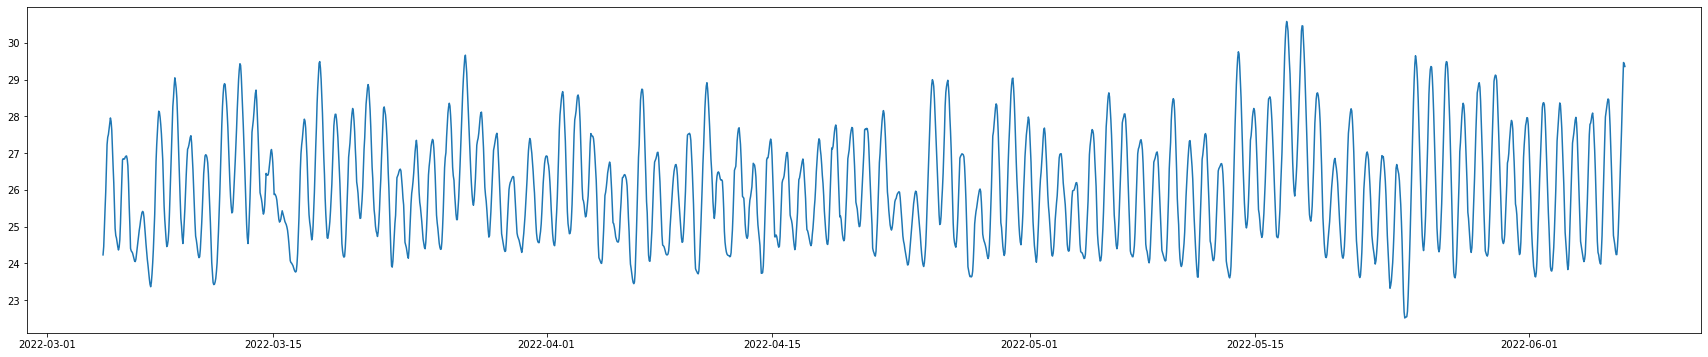

In [21]:
media_moveltemp = serie_temp.rolling(window=12)
media_moveltemp = media_moveltemp.mean()
plt.plot(media_moveltemp);

Comparando a série original com a série da média móvel

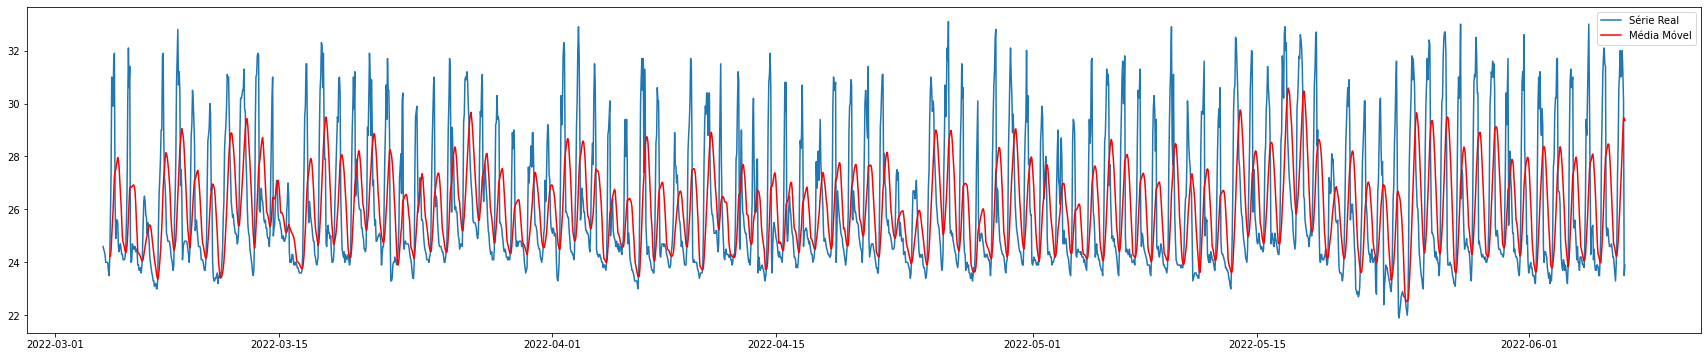

In [22]:
plt.plot(serie_temp, label='Série Real')
plt.plot(media_moveltemp,color='red', label='Média Móvel')
plt.legend(loc='best')
plt.show()

###**Decomposição**

Para ver a complexidade por trás da visualização linear, podemos decompor os dados. A função chamada seasonal_decompose dentro do statsmodels pacote pode nos ajudar a decompor os dados em seus componentes / mostram padrões - tendência, sazonalidade e componentes residuais de séries temporais.

Tendência:

A tendência dos dados de crescer ou diminuir em longo período de tempo. Essa análise pode ser feita observando um gráfico de linha, onde conseguimos ver um crescimento ou uma diminuição suave com o tempo.

Sazonalidade:

Essa é uma variação dos dados que se repete, de acordo com algum padrão, dentro de um curto intervalo de tempo bem definido (um ano no máximo). Podemos observar a sazonalidade no trânsito, que aumenta sempre nos horários de começo e fim de expediente, ou nas vendas de sorvete que aumentam sempre no verão e caem sempre no inverno.

Ciclicidade

Também é uma variação nos dados observada com algum padrão só que em longos períodos de tempo (mais de um ano) que nem sempre são iguais. Como a venda de casas, que por mais que possa ter alguma sazonalidade durante o ano, tem um ciclo de altas e baixas vendas quando observadas ao longo de décadas.

Residuos:

São variações que não são explicadas pelas variáveis do dataset. Em geral são aleatórias.

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


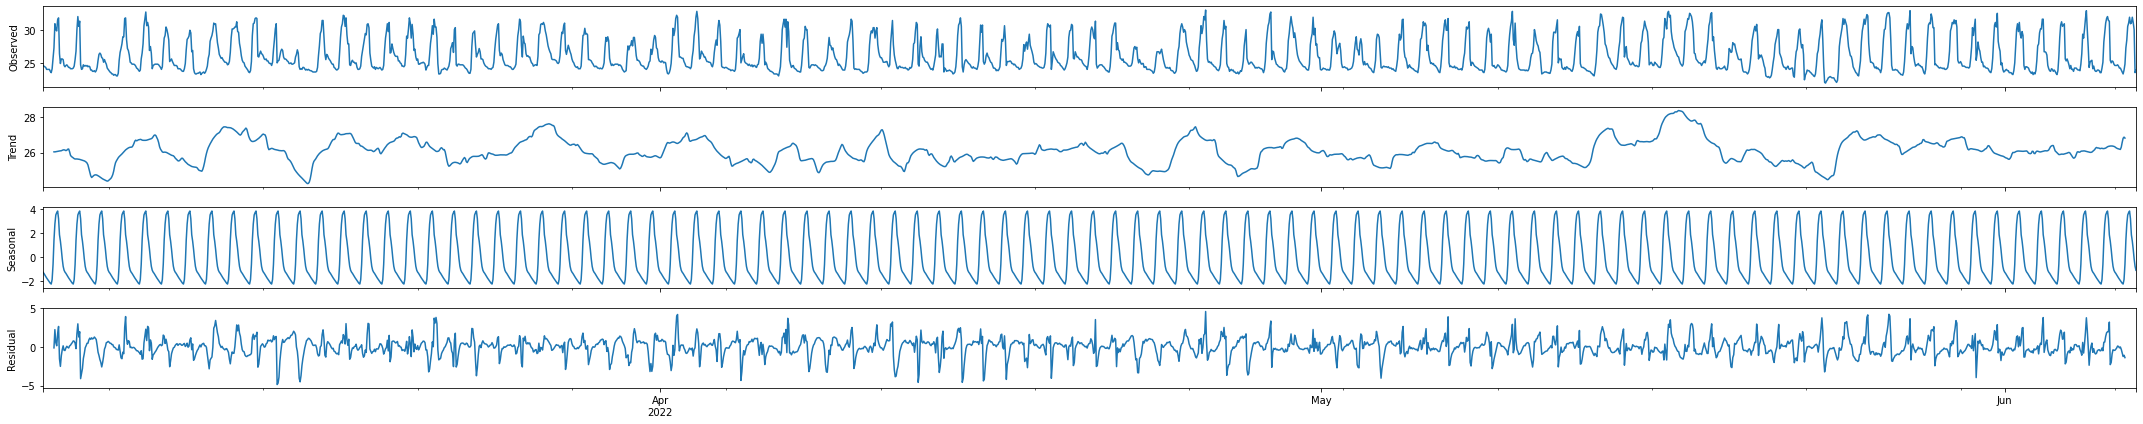

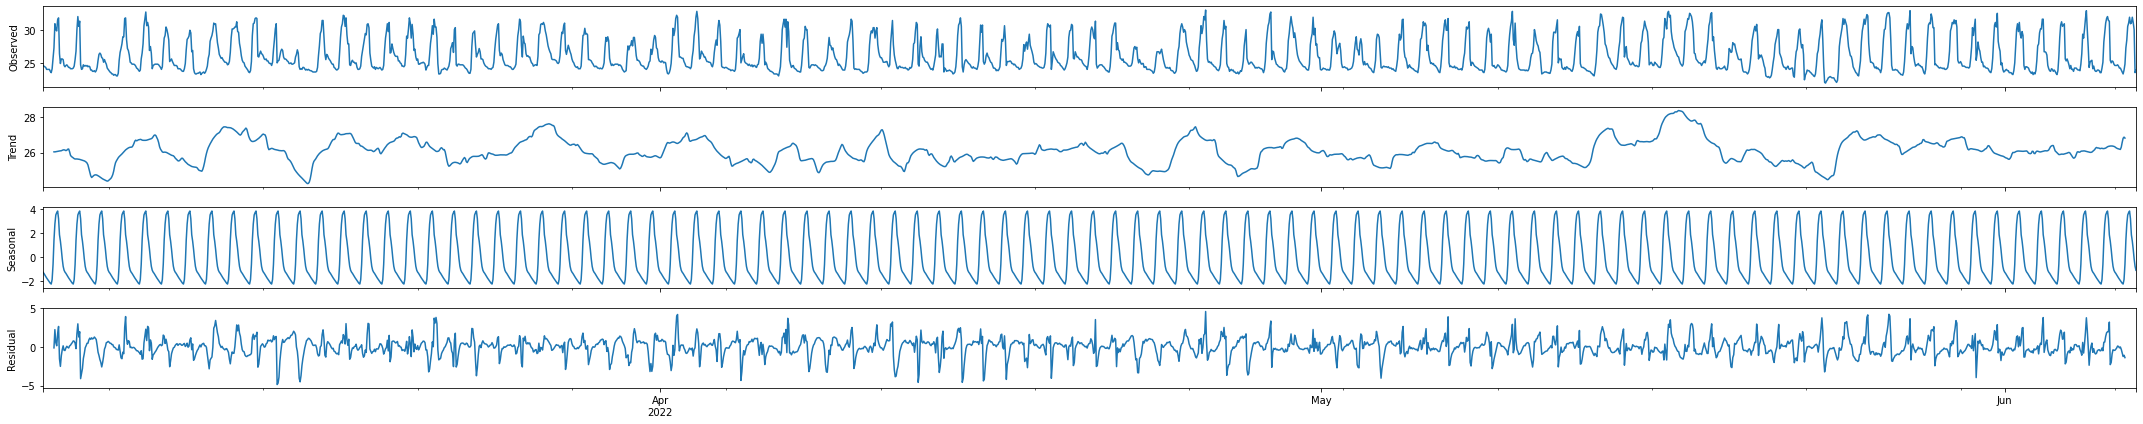

In [25]:
decomposicaotemp = seasonal_decompose(serie_temp)
decomposicaotemp.plot()

### **Normalidade e Transformação**


In [26]:
import scipy.stats as stats

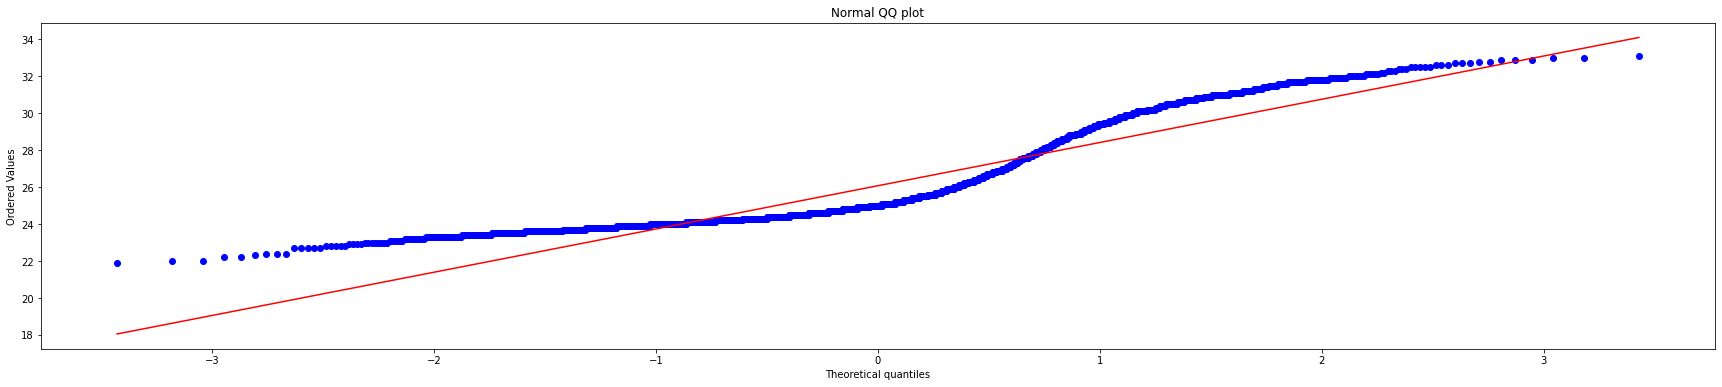

In [27]:
stats.probplot(serie_temp, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [28]:
e, p = stats.shapiro(serie_temp)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.8645451068878174
p-valor: 1.392708504738506e-40


Transformação por log (Diminuir variância e melhorar normalidade)

In [29]:
serie_temp2 = np.log(serie_temp)
serie_temp2

2022-03-04 00:00:00    3.202746
2022-03-04 01:00:00    3.198673
2022-03-04 02:00:00    3.194583
2022-03-04 03:00:00    3.190476
2022-03-04 04:00:00    3.178054
                         ...   
2022-06-06 19:00:00    3.465736
2022-06-06 20:00:00    3.440418
2022-06-06 21:00:00    3.404525
2022-06-06 22:00:00    3.157000
2022-06-06 23:00:00    3.173878
Freq: H, Length: 2280, dtype: float64

In [30]:
e, p = stats.shapiro(serie_temp2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.8818655014038086
p-valor: 1.401057721248646e-38


In [31]:
serie_temp3 = (serie_temp)**(1/3)
serie_temp3

2022-03-04 00:00:00    2.908339
2022-03-04 01:00:00    2.904393
2022-03-04 02:00:00    2.900436
2022-03-04 03:00:00    2.896468
2022-03-04 04:00:00    2.884499
                         ...   
2022-06-06 19:00:00    3.174802
2022-06-06 20:00:00    3.148122
2022-06-06 21:00:00    3.110681
2022-06-06 22:00:00    2.864327
2022-06-06 23:00:00    2.880487
Freq: H, Length: 2280, dtype: float64

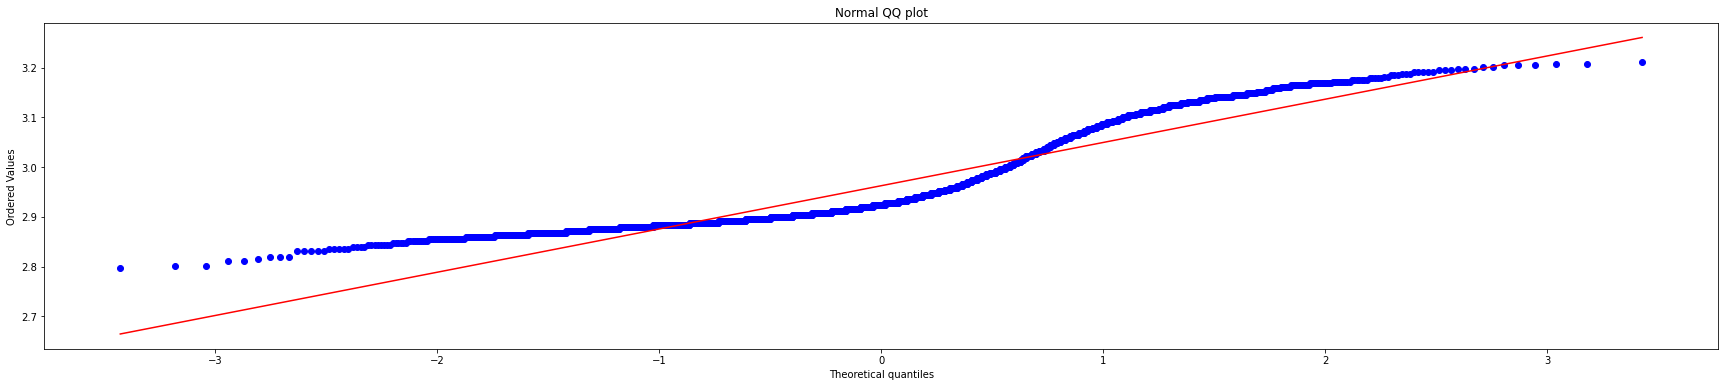

In [32]:
stats.probplot(serie_temp3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [33]:
e, p =stats.shapiro(serie_temp3)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.876253604888916
p-valor: 2.9720265246726834e-39


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


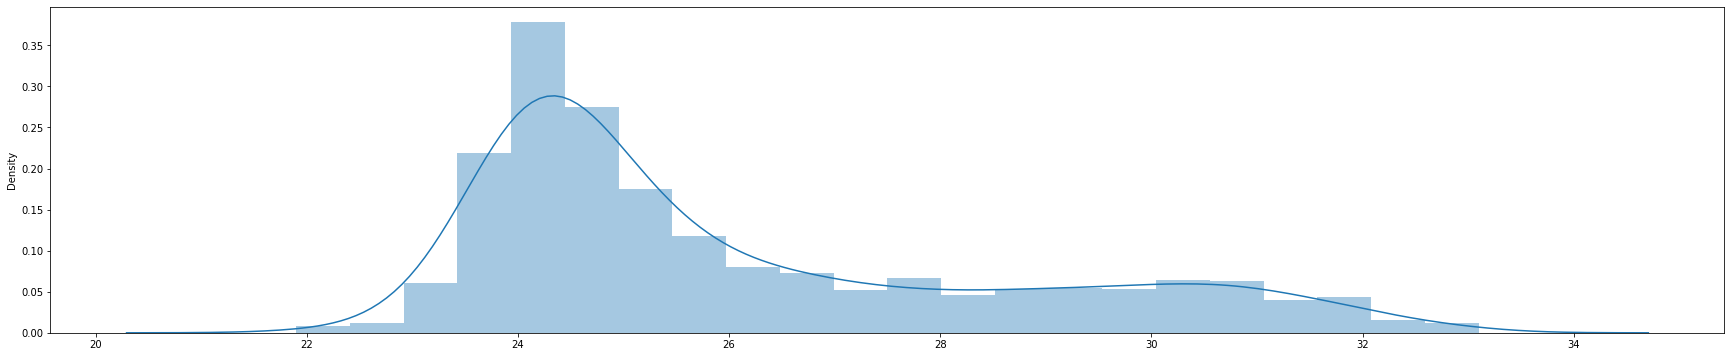

In [34]:
import seaborn as sns
sns.distplot(serie_temp);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


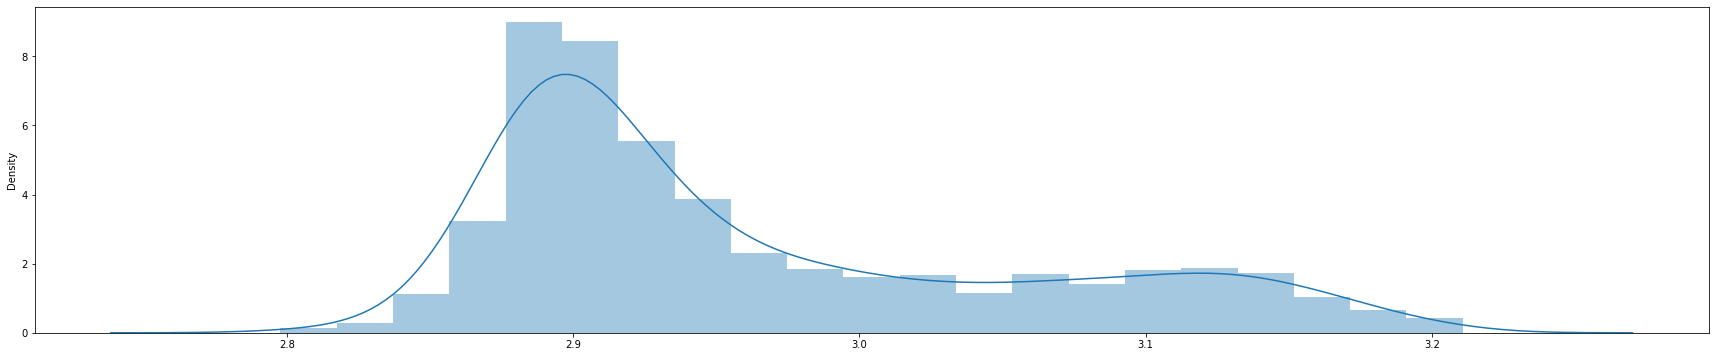

In [37]:
sns.distplot(serie_temp3);

### **Estacionaridade**

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário: estatística do teste < valor crítico

In [39]:
import statsmodels.tsa.stattools

In [40]:
kpss = statsmodels.tsa.stattools.kpss(serie_temp3)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.1130
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


A série é estacionária

### **Autocorrelação**

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

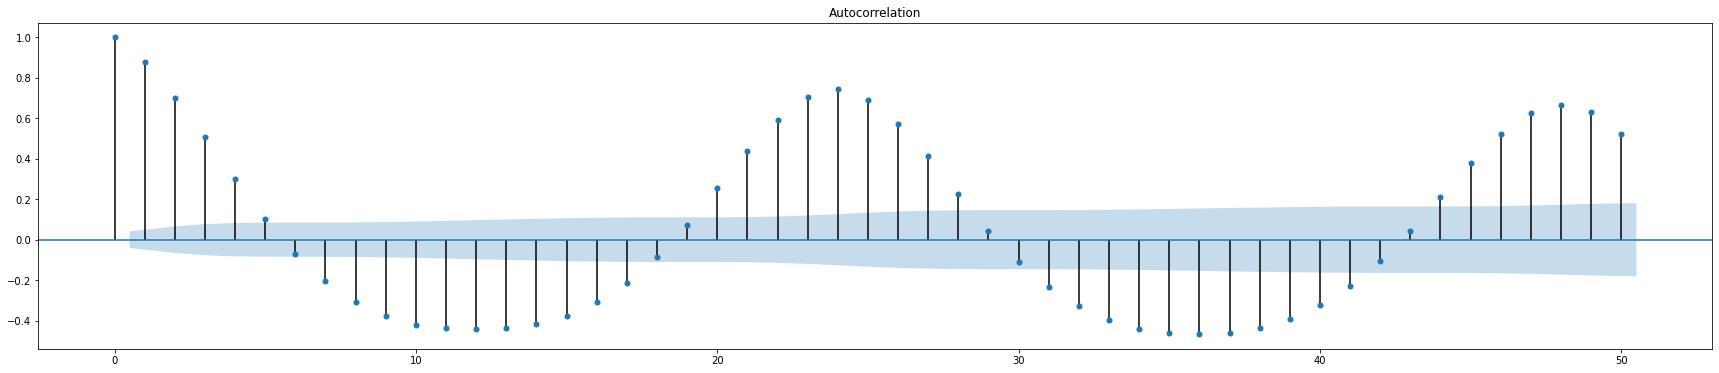

In [42]:
plot_acf(serie_temp3, lags=50)
plt.show()

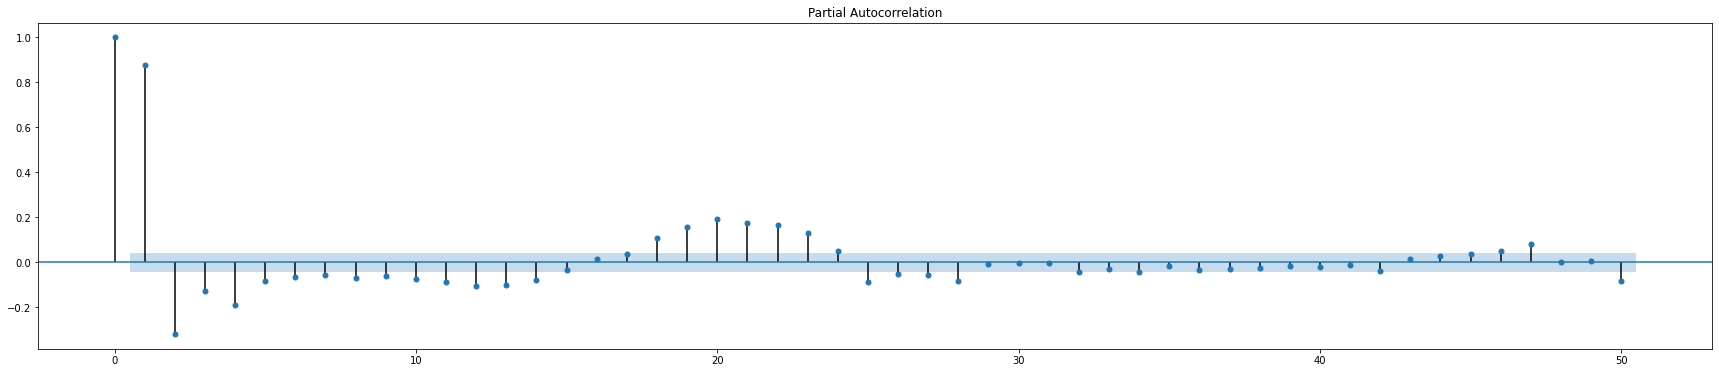

In [43]:
plot_pacf(serie_temp3, lags=50)
plt.show()

## **Modelo ARMA**

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
modelo_arma = ARIMA(serie_temp3, order = (4,0,6))

In [54]:
resultado = modelo_arma.fit()
print(resultado.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: Converge

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2280
Model:                     ARMA(4, 6)   Log Likelihood                4289.562
Method:                       css-mle   S.D. of innovations                nan
Date:                Fri, 17 Jun 2022   AIC                          -8555.124
Time:                        18:09:42   BIC                          -8486.341
Sample:                    03-04-2022   HQIC                         -8530.036
                         - 06-06-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9624      0.002   1869.030      0.000       2.959       2.965
ar.L1.y        3.6641   1.61e-05   2.28e+05      0.000       3.664       3.664
ar.L2.y       -5.3464    1.9e-07  -2.81e+07      0.0

### **Análise dos Resíduos**

In [56]:
residuos = resultado.resid

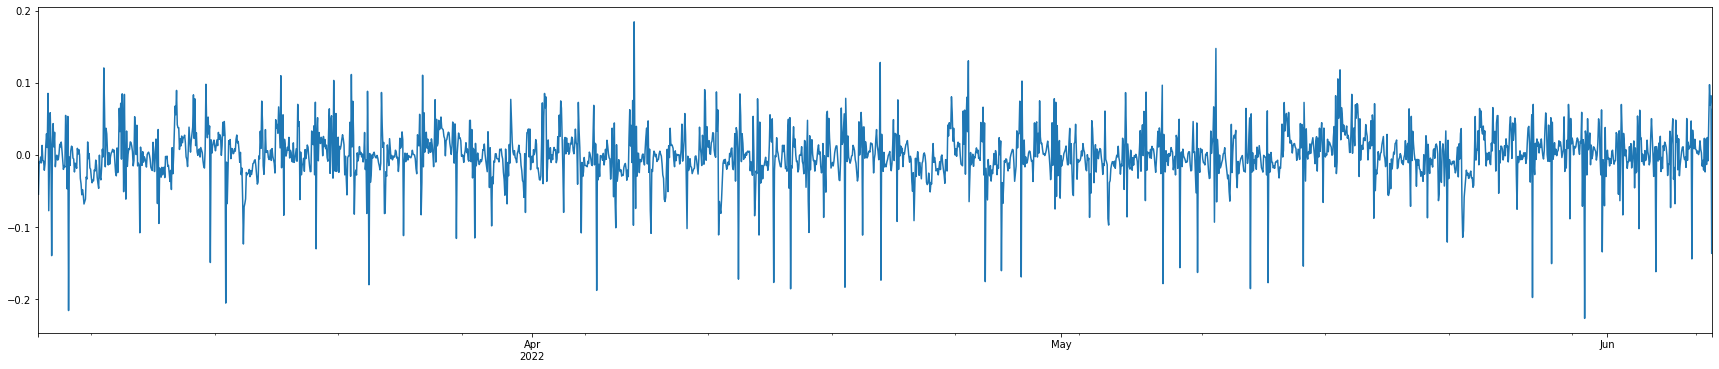

In [57]:
residuos.plot()
plt.show()

**Normalidade**

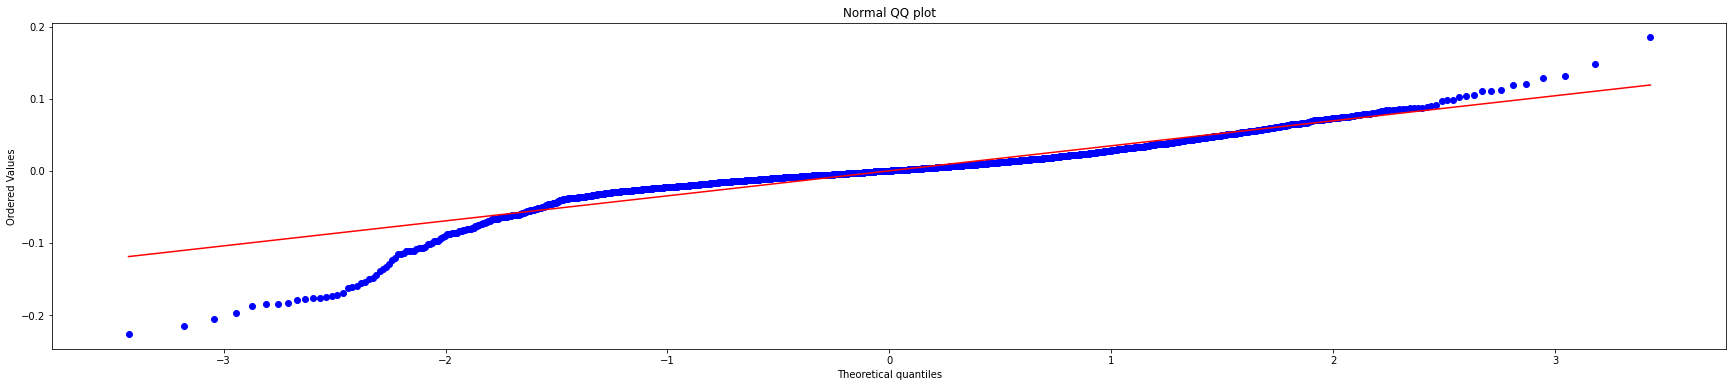

In [58]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [59]:
e, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.8933660984039307
p-valor: 4.083985947070545e-37


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


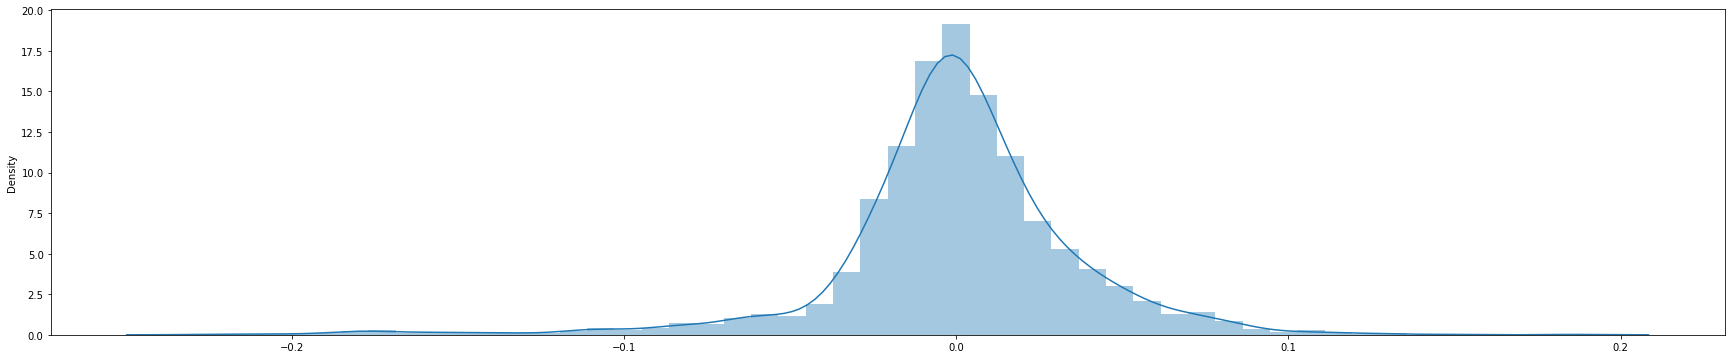

In [60]:
import seaborn as sns
sns.distplot(residuos);

**Autocorrelação**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

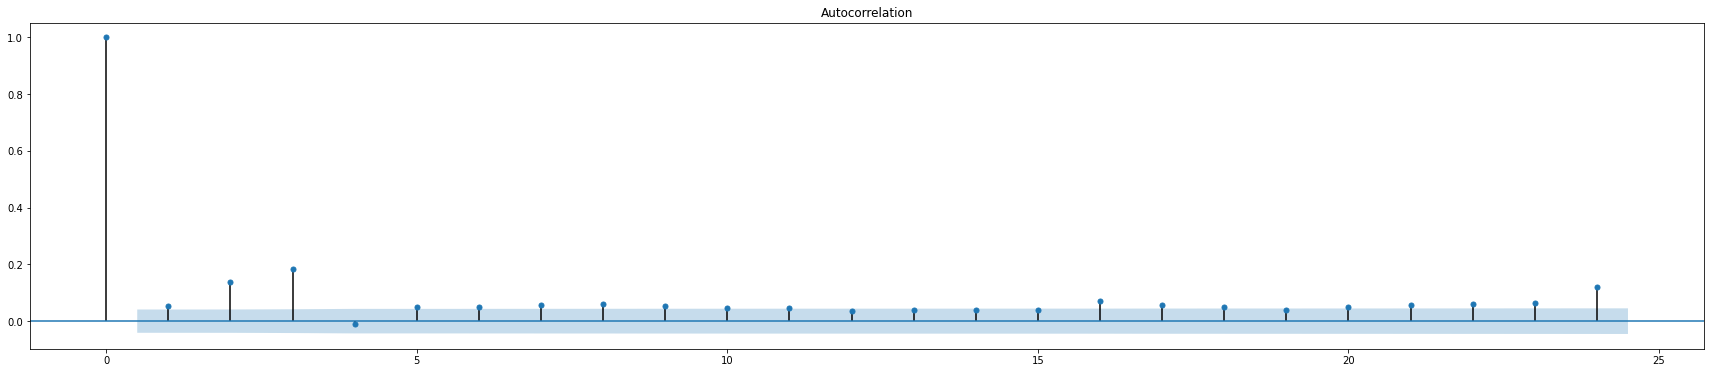

In [61]:
plot_acf(residuos, lags=24)
plt.show()

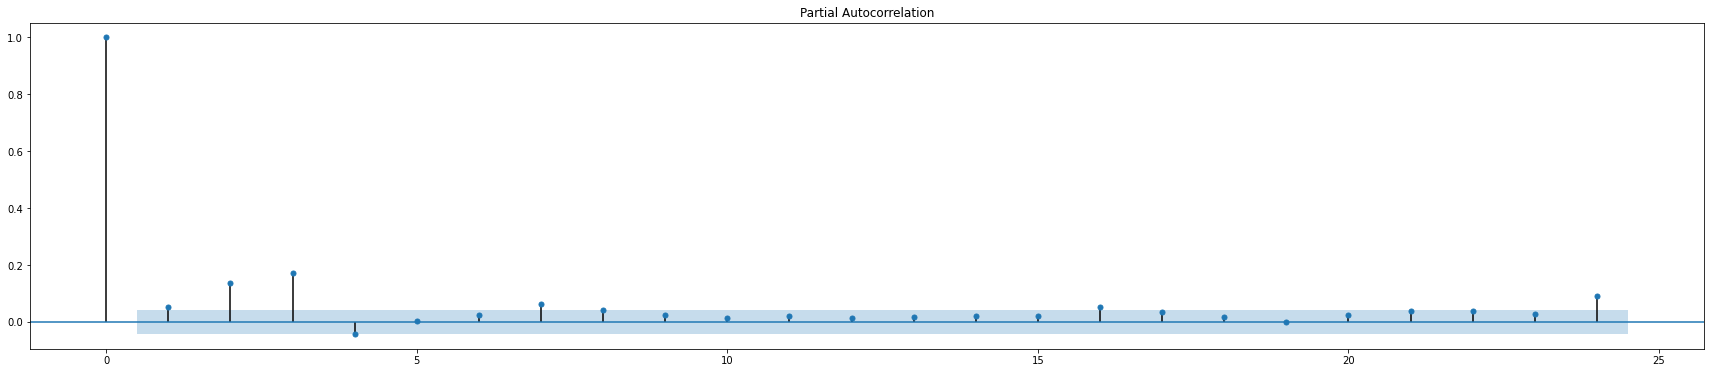

In [62]:
plot_pacf(residuos, lags=24)
plt.show()

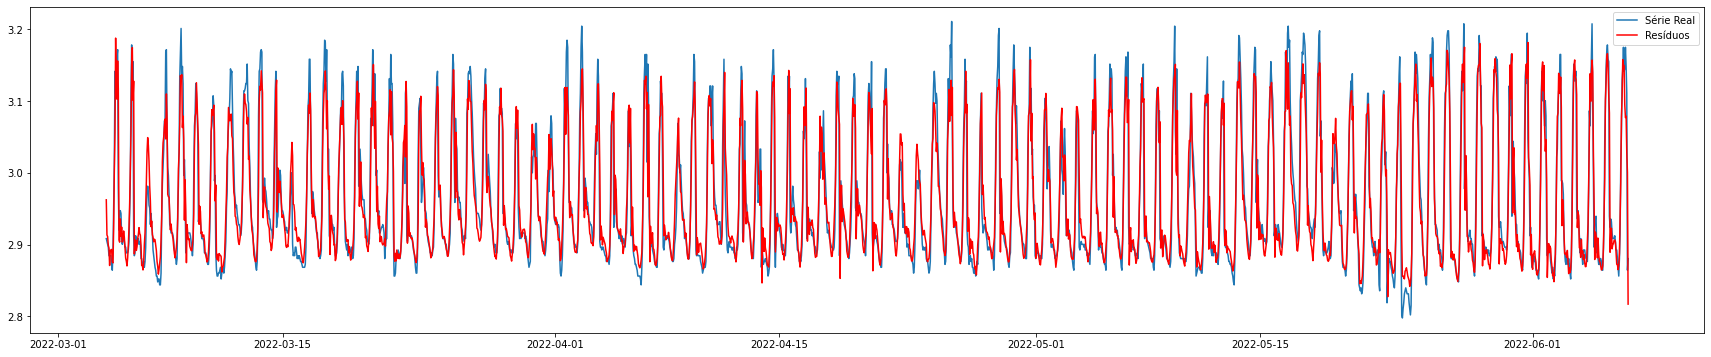

In [63]:
plt.plot(serie_temp3, label='Série Real')
plt.plot(serie_temp3-residuos,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [64]:
resultado.fittedvalues

2022-03-04 00:00:00    2.962374
2022-03-04 01:00:00    2.913339
2022-03-04 02:00:00    2.911135
2022-03-04 03:00:00    2.899042
2022-03-04 04:00:00    2.895125
                         ...   
2022-06-06 19:00:00    3.076945
2022-06-06 20:00:00    3.078955
2022-06-06 21:00:00    3.028183
2022-06-06 22:00:00    3.000536
2022-06-06 23:00:00    2.817054
Freq: H, Length: 2280, dtype: float64

In [65]:
previsao = resultado.predict(2280, end=2375)
previsao

2022-06-07 00:00:00    2.895758
2022-06-07 01:00:00    2.907725
2022-06-07 02:00:00    2.892608
2022-06-07 03:00:00    2.891758
2022-06-07 04:00:00    2.884051
                         ...   
2022-06-10 19:00:00    3.053295
2022-06-10 20:00:00    2.999740
2022-06-10 21:00:00    2.952071
2022-06-10 22:00:00    2.916732
2022-06-10 23:00:00    2.896213
Freq: H, Length: 96, dtype: float64

In [66]:
previsao2 = resultado.forecast(2280)
previsao2

(array([2.89575843, 2.90772505, 2.89260751, ..., 2.98219797, 2.94003967,
        2.91147061]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]]))

In [67]:
previsao3 = previsao2[0]
previsao3

array([2.89575843, 2.90772505, 2.89260751, ..., 2.98219797, 2.94003967,
       2.91147061])

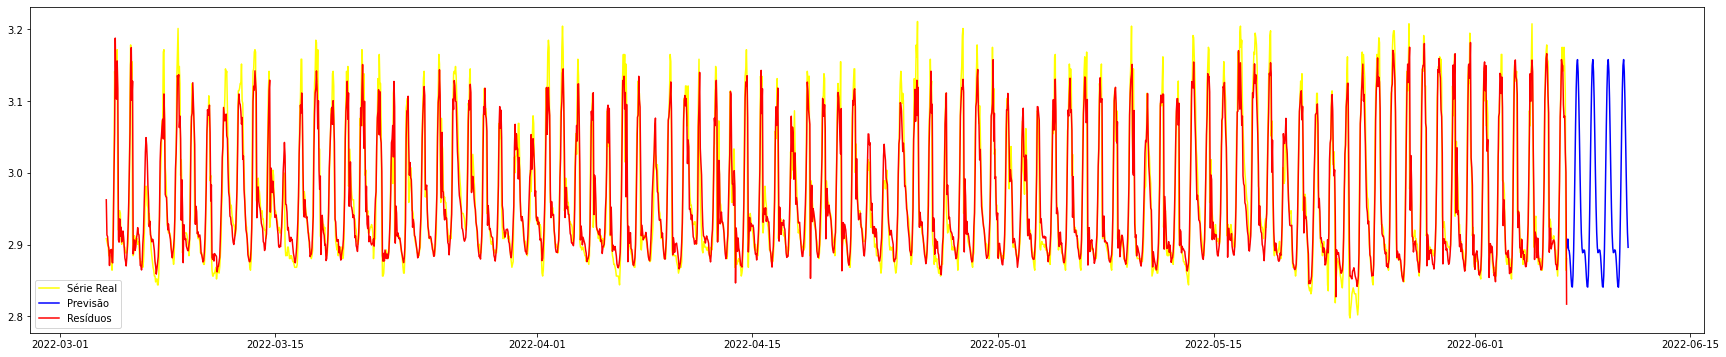

In [68]:
plt.plot(serie_temp3,color='yellow', label='Série Real')
plt.plot(previsao,color='blue', label='Previsão')
plt.plot(serie_temp3-residuos,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [70]:
prev_escala = pd.DataFrame(previsao ** 3, columns=['Previsão_ARMA'])
prev_escala

,Previsão_ARMA
2022-06-07 00:00:00,24.282142
2022-06-07 01:00:00,24.584423
2022-06-07 02:00:00,24.202962
2022-06-07 03:00:00,24.181649
2022-06-07 04:00:00,23.988822
...,...
2022-06-10 19:00:00,28.464683
2022-06-10 20:00:00,26.992986
2022-06-10 21:00:00,25.726486
2022-06-10 22:00:00,24.813589


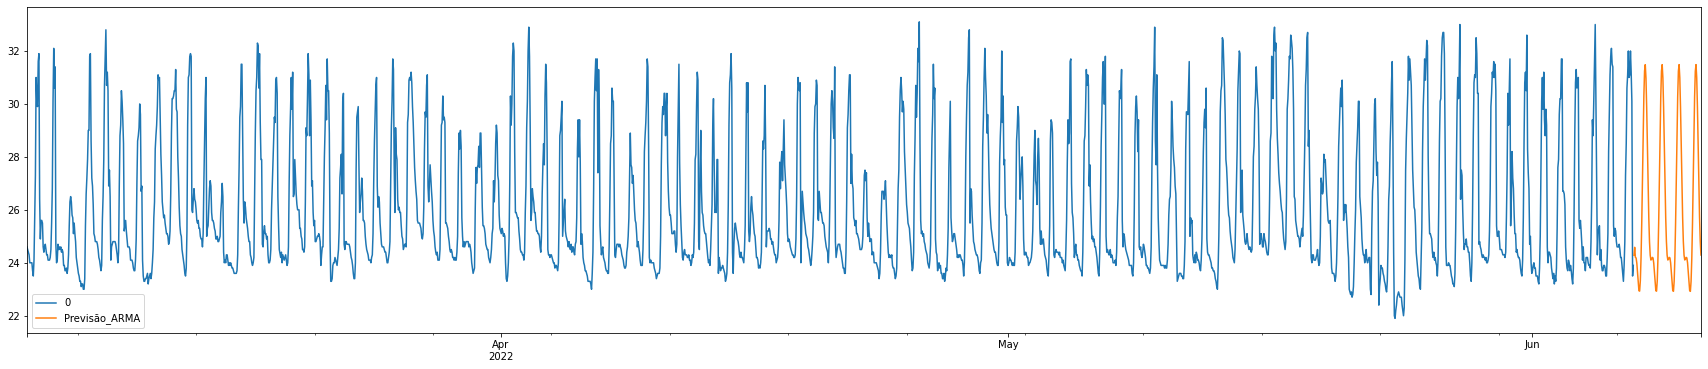

In [71]:
pd.concat([serie_temp,prev_escala]).plot();

Convertendo resultados para csv

In [ ]:
csv = prev_escala.to_csv(index=True)
csv